<a href="https://colab.research.google.com/github/yewchung56/git_test2/blob/main/mahinelearning_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def AND(x1, x2):
	x = np.array([x1, x2])
	w = np.array([0.4, 0.4])
	b = -0.7
	tmp = np.sum(w*x)+b
	if tmp <= 0:
		return 0
	else:
		return 1
AND(0,1)

0

In [ ]:
def OR(x1, x2):
	x = np.array([x1, x2])
	w = np.array([0.5, 0.5])
	b = -0.2
	tmp = np.sum(w * x) + b
	if tmp <= 0:
		return 0
	else:
		return 1

OR(0,1)

1

##NAND: 둘다 1일때만 0 출력

In [ ]:
def NAND(x1, x2):
	x = np.array([x1, x2])
	w = np.array([-0.5, -0.5])
	b = 0.7
	tmp = np.sum(w*x)+b
	if tmp <= 0:
		return 0
	else:
		return 1

NAND(0,0)

1

## XOR 게이트
    
    > 입력값 두 개가 서로 다른 값을 갖고 있을때만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트
  

In [ ]:
def XOR_gate(x1, x2):
	s1 = NAND(x1, x2)
	s2 = OR(x1, x2)
	y = AND(s1, s2)
	return y

XOR_gate(1, 1) #0출력

0

##4. 본격적인 ANN 시작하기
####활성화 함수 (Activation function)

Step Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
	return np.array(x > 0, dtype=np.int) # NumPy 데이터 형태 지정

<ipython-input-82-e26f79846413>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


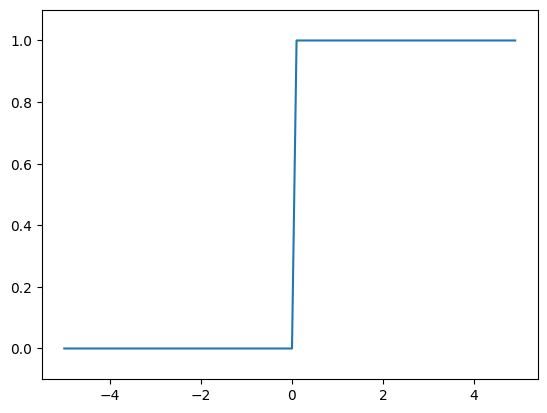

In [ ]:
def step_function(x):
  return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0,0.1)
#np.arange(시작점(생략 시 0), 끝점(미포함), step size(생략 시 1))
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()


Sigmoid Function

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [ ]:
x = np.arange(-5.0, 5.0,0.1)
#np.arange(시작점(생략 시 0), 끝점(미포함), step size(생략 시 1))
y = sigmoid(x)

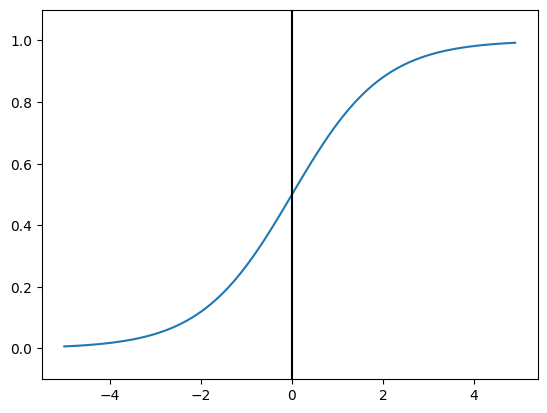

In [ ]:
plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.vlines(x=0,ymin=-0.1, ymax=1.1, color="black")
plt.show()

ReLu Function

In [ ]:
def ReLU(x):
	return np.maximum(0, x)

##Appendix
##Perceptron with Iris

In [ ]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_iris
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
iris_data = load_iris()

iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))
iris_dataset = list(iris_dataset)
# random seed 설정해주기
random.shuffle(iris_dataset)

def seperate_dataset():
    part_A_train = iris_dataset[0:40]
    part_A_test = iris_dataset[40:50]
    part_B_train = iris_dataset[50:90]
    part_B_test = iris_dataset[90:100]
    part_C_train = iris_dataset[100:140]
    part_C_test = iris_dataset[140:150]
    train = np.concatenate((part_A_train, part_B_train, part_C_train))
    #
    test = np.concatenate((part_A_test, part_B_test, part_C_test))

    return train, test

train, test = seperate_dataset()

x_train = np.array([i[:4] for i in train])
y_train = np.array([i[4] for i in train])
x_test = np.array([i[:4] for i in test])
y_test = np.array([i[4] for i in test])

In [ ]:
class MLP(BaseEstimator, ClassifierMixin):

    def __init__(self):
        self.input_layer = 4
        self.hidden_layer = 5
        self.output_layer = 3
        self.learning_rate = 0.001
        self.max_epochs = 100
        self.bias_hidden_value = -1
        self.bias_output_value = -1

        self.w_hidden = [[2 * random.random() - 1 for i in range(self.hidden_layer)] for j in range(self.input_layer)]
        self.w_output = [[2 * random.random() - 1 for i in range(self.output_layer)] for j in range(self.hidden_layer)]

        self.bias_hidden = np.array([self.bias_hidden_value for i in range(self.hidden_layer)])
        self.bias_output = np.array([self.bias_output_value for i in range(self.output_layer)])

        self.n_class =3

    def activation_func(self,x):
        # sigmoid
        return 1 / (1 + np.exp(-x))

    def derivation_func(self,x):
        # sigmoid
        return x * (1 - x)

    def backpropagation(self,x):
        D_output=[]
        erro_output = self.output-self.output_l2
        D_output = -1 * erro_output * self.derivation_func(self.output_l2)

        for i in range(self.hidden_layer):
            for j in range(self.output_layer):
                self.w_output[i][j] -= self.learning_rate * (D_output[j] * self.output_l1[i])
                self.bias_output[j] -= self.learning_rate * D_output[j]

        D_hidden = np.matmul(self.w_output, D_output) * self.derivation_func(self.output_l1)

        for i in range(self.output_layer):
            for j in range(self.hidden_layer):
                self.w_hidden[i][j] -= self.learning_rate * (D_hidden[j] * x[i])
                self.bias_hidden[j] -= self.learning_rate * D_hidden[j]

    def predict(self, x, y):
        forecasts = []
        forward = self.activation_func(np.matmul(x, self.w_hidden) + self.bias_hidden)
        forward = np.matmul(forward, self.w_output) + self.bias_output

        for i in forward:
            forecasts.append(max(enumerate(i), key=lambda x : x[1])[0])

        array_score = []
        for i in range(len(forecasts)):
            if forecasts[i] == 0:
                array_score.append([i, "Iris-setosa", forecasts[i], y[i]])
            elif forecasts[i] == 1:
                array_score.append([i, "Iris-versicolour", forecasts[i], y[i]])
            elif forecasts[i] == 2:
                array_score.append([i, "Iris-virginica", forecasts[i], y[i]])
        dataframe = pd.DataFrame(array_score, columns=['id','class','model','target'])

        return forecasts, dataframe

    def fit(self,x,y):
        total_error = 0
        n = len(x)

        for epoch in range(self.max_epochs):
            for (idx, inputs) in enumerate(x):
                self.output = np.zeros(self.n_class)
                self.output_l1 = self.activation_func(np.dot(inputs, self.w_hidden)+self.bias_hidden.T)
                self.output_l2 = self.activation_func(np.dot(self.output_l1, self.w_output)+ self.bias_output.T)
                if y[idx] == 0:
                    self.output = np.array([1,0,0])
                elif y[idx] == 1:
                    self.output = np.array([0,1,0])
                elif y[idx] == 2:
                    self.output = np.array([0,0,1])

                square_error = 0
                for i in range(self.output_layer):
                    erro = (self.output[i] - self.output_l2[i]) ** 2
                    square_error = square_error + 0.05 * erro
                    total_error = total_error + square_error
                self.backpropagation(inputs)

            total_error = total_error / n
            print(f"[Epoch {epoch+1}] Total_error : {total_error}")

In [ ]:
mlp = MLP()
mlp.fit(x_train, y_train)

forecast, df = mlp.predict(x_test, y_test)


[Epoch 1] Total_error : 0.07721874000621606
[Epoch 2] Total_error : 0.07740795580468089
[Epoch 3] Total_error : 0.07725937242590901
[Epoch 4] Total_error : 0.07710905756162413
[Epoch 5] Total_error : 0.07695981900459777
[Epoch 6] Total_error : 0.07681168875384253
[Epoch 7] Total_error : 0.07666467709114648
[Epoch 8] Total_error : 0.07651879556535124
[Epoch 9] Total_error : 0.07637405720643621
[Epoch 10] Total_error : 0.0762304765363829
[Epoch 11] Total_error : 0.07608806956258632
[Epoch 12] Total_error : 0.07594685375321965
[Epoch 13] Total_error : 0.07580684799262564
[Epoch 14] Total_error : 0.07566807251510213
[Epoch 15] Total_error : 0.07553054881581907
[Epoch 16] Total_error : 0.07539429953807258
[Epoch 17] Total_error : 0.07525934833660032
[Epoch 18] Total_error : 0.07512571971727552
[Epoch 19] Total_error : 0.07499343885412631
[Epoch 20] Total_error : 0.07486253138528398
[Epoch 21] Total_error : 0.07473302319011829
[Epoch 22] Total_error : 0.07460494015044944
[Epoch 23] Total_err

##LeNet-5

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, AveragePooling2D, Flatten, Dense, ZeroPadding2D

from sklearn.model_selection import train_test_split

전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#데이터 형태 변형시켜주기.
#28x28 크기의 이미지로 재구성.
#이는 신경망에 입력하기 적합한 형태로 만들기 위함임
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

# 8bit의 이미지이므로 (0-255범위로) 나누어줌
#rgb값이 가질 수 있는 최대값이 255이기 때문.
#각 픽셀 값이 0에서 255 사이의 정수
#픽셀 값을 0과 1 사이로 정규화
x_train=x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [ ]:
LeNet = Sequential([InputLayer(input_shape=(28,28,1)),
                    ZeroPadding2D((2,2)),
                    #입력 이미지의 가장자리에 패딩을 추가해, 컨볼루션 레이어에서 이미지 크기가 줄어드는 것을 방지하고 가장자리 정보를 유지
                    #입력 이미지 주변에 0으로 패딩을 추가. 이는 이미지의 크기를 조정하고, 가장자리 정보를 유지하는 데 도움이된다.
                    Conv2D(6,5, activation="tanh"),
                    #컨볼루션(필터링)을 수행하여 이미지의 특징을 추출
                    #첫 번째 컨볼루션 레이어
                    #5x5 커널을 사용
                    #6개의 필터를 가지며
                    #활성화 함수로는 하이퍼볼릭 탄젠트(tanh)를 사용
                    AveragePooling2D(strides=2),
                    #그림에서 6@14x14부
                    #풀링 레이어
                    #특성 맵의 크기를 줄이고, 중요한 정보를 유지하면서 데이터의 양을 감소시킨다.
                    #평균 풀링은 윈도우 내의 평균 값을 취함.
                    #스트라이드 2를 사용하여 특성 맵의 크기를 줄인다.
                    Conv2D(16,5,activation="tanh"),
                    # 두 번째 컨볼루션 레이어로, 5x5 커널과 16개의 필터를 사용
                    AveragePooling2D(strides=2),
                    #한 번 더 적용
                    Conv2D(120,5, activation="tanh"),
                    Flatten(),
                    #2D 특성 맵을 1D 벡터로 변환. 이는 컨볼루션 레이어와 완전 연결 레이어 사이의 연결을 가능하게 한다.
                    #3차원 특성 맵을 1차원으로 변환
                    Dense(84,activation="tanh"),
                    #모든 입력이 모든 출력과 연결. 분류 문제를 위한 최종 결정을 내리는 데 사용됨.
                    #완전 연결 레이어(Dense Layer)로, 84개의 노드를 가지며 tanh 활성화 함수를 사용
                    Dense(10,activation="softmax")])#출력층
                    #FClayer라고도 할 수 있다.
                    #10개의 노드(클래스 수에 해당)를 가지며, softmax 활성화 함수를 사용하여 다중 클래스 분류를 수행

In [ ]:
LeNet.compile(optimizer="SGD",
              #경사 하강법
              #모델의 가중치를 업데이트하는 데 사용
              loss="sparse_categorical_crossentropy",
              #다중 클래스 분류 문제에 적합한 손실 함수로, 실제 레이블이 정수 형태로 제공될 때 사용
              #카테고리로 나눌때사용.
              metrics="accuracy")

In [ ]:
LeNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPadd  (None, 32, 32, 1)         0         
 ing2D)                                                          
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                      

In [ ]:
LeNet.fit(x_train, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.7002 - accuracy: 0.8132
Epoch 2/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.3039 - accuracy: 0.9098
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2346 - accuracy: 0.9306
Epoch 4/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1886 - accuracy: 0.9442
Epoch 5/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.1557 - accuracy: 0.9536
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1313 - accuracy: 0.9615
Epoch 7/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1136 - accuracy: 0.9665
Epoch 8/10
1500/1500 [==============================] - 32s 22ms/step - loss: 0.1002 - accuracy: 0.9703
Epoch 9/10
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0895 - accuracy: 0.9735
Epoch 10/10
1500/1500 [==============================] - 40s 27m

In [ ]:
LeNet.evaluate(x_test, y_test)

313/313 [==============================] - 6s 16ms/step - loss: 0.0773 - accuracy: 0.9763


[0.07728603482246399, 0.9763000011444092]

##AlexNet

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.metrics import Precision, Recall


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/archive (3).zip (Unzipped Files)/dogs_vs_cats/train",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(227,227)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/archive (3).zip (Unzipped Files)/dogs_vs_cats/test",
    labels="inferred", # labels are generated from the directory structure
    label_mode='int', # 0=cats & 1=dogs
    batch_size=32,
    image_size=(227,227)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

상자를 마련하고
레이어를 더하는 형식으로
모델 선언하기

In [ ]:
model = Sequential(name='alex_net')
model.add(Conv2D(filters=96, kernel_size=11,strides=4,activation='relu',input_shape=(227,227,3)))
model.add(MaxPool2D(pool_size=3,strides=2))

model.add(Conv2D(filters=256, kernel_size=5, activation='relu',padding="same"))
model.add(MaxPool2D(pool_size=3,strides=2))

model.add(Conv2D(filters=384, kernel_size=3,strides=1,activation='relu',padding="same"))
model.add(Conv2D(filters=384,kernel_size=3,strides=1,activation='relu',padding="same"))
model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation='relu',padding="same"))
model.add(MaxPool2D(pool_size=3,strides=2))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=[ Precision(), Recall()])




In [ ]:
model.fit(train_ds, epochs=2,validation_data=test_ds)

Epoch 1/2
625/625 [==============================] - 4234s 7s/step - loss: 0.7023 - precision: 0.4978 - recall: 0.6427 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/2
625/625 [==============================] - 3710s 6s/step - loss: 0.6933 - precision: 0.4914 - recall: 0.4556 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


##VGG뇌종양
BatchNormalization2트

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import os
import os.path
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd

train_path = Path("/content/drive/MyDrive/brain.zip (Unzipped Files)/Training")
test_path = Path("/content/drive/MyDrive/brain.zip (Unzipped Files)/Testing")

train_jpg_path = list(train_path.glob(r"*/*.jpg"))
test_jpg_path = list(test_path.glob(r"*/*.jpg"))

train_jpg_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_jpg_path))
test_jpg_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_jpg_path))

train_jpg_path_series = pd.Series(train_jpg_path,name="JPG").astype('str')
train_jpg_labels_series = pd.Series(train_jpg_labels,name="CATEGORY").astype('str')

test_jpg_path_series = pd.Series(test_jpg_path,name="JPG").astype(str)
test_jpg_labels_series = pd.Series(test_jpg_labels,name="CATEGORY").astype(str)

main_train_data = pd.concat([train_jpg_path_series, train_jpg_labels_series],axis=1)
main_test_data = pd.concat([test_jpg_path_series, test_jpg_labels_series],axis=1)
main_train_data = main_train_data.sample(frac=1).reset_index(drop=True)
main_test_data = main_test_data.sample(frac=1).reset_index(drop=True)

train_img_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=25,
                                   brightness_range=[0.3,0.7],
                                   width_shift_range=0,
                                   height_shift_range=0,
                                   zoom_range=0)

test_img_generator = ImageDataGenerator(rescale=1./255,
                                       rotation_range=25,
                                        brightness_range=[0.3,0.7],
                                        width_shift_range=0,
                                        height_shift_range=0,
                                        zoom_range=0)

train_ds = train_img_generator.flow_from_dataframe(dataframe=main_train_data,
                                                    x_col="JPG",
                                                       y_col="CATEGORY",
                                                       color_mode="rgb",
                                                       class_mode="categorical",
                                                       batch_size=10,
                                                       subset="training",
                                                       target_size=(227,227))

test_ds = test_img_generator.flow_from_dataframe(dataframe=main_test_data,
                                                      x_col="JPG",
                                                      y_col="CATEGORY",
                                                      color_mode='rgb',
                                                      class_mode="categorical",
                                                      batch_size=10,
                                                      subset="training",
                                                      target_size=(227,227))

train_valid =train_img_generator.flow_from_dataframe(dataframe=main_train_data,
                                                       x_col="JPG",
                                                       y_col="CATEGORY",
                                                       color_mode="rgb",
                                                       class_mode="categorical",
                                                       batch_size=10,
                                                       subset="training",
                                                          target_size=(227,227))

test_valid =test_img_generator.flow_from_dataframe(dataframe=main_test_data,
                                                              x_col="JPG",
                                                              y_col="CATEGORY",
                                                              color_mode="rgb",
                                                              class_mode="categorical",
                                                              batch_size=10,
                                                              subset="training",
                                                              target_size=(227,227))

Found 2870 validated image filenames belonging to 4 classes.
Found 394 validated image filenames belonging to 4 classes.
Found 2870 validated image filenames belonging to 4 classes.
Found 394 validated image filenames belonging to 4 classes.


In [ ]:
# VGG16 모델 불러오기 (최상위 층 제외)
#vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# 모델 구조 정의
vgg = Sequential([
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4개의 출력을 가진 분류 레이어
])

# EarlyStopping 콜백 생성
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표
    min_delta=0.001,     # 개선으로 인정되는 최소한의 변화량
    patience=10,         # 10 에포크 동안 개선이 없으면 조기 종료
    verbose=1,           # 조기 종료 상황에 대한 정보 출력
    restore_best_weights=True  # 조기 종료 시, 가장 좋은 가중치로 복원
)

In [ ]:
# 모델 컴파일
vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg.fit(train_ds, epochs=2,validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/2
287/287 [==============================] - 918s 3s/step - loss: 1.0810 - accuracy: 0.5129 - val_loss: 1.6521 - val_accuracy: 0.3680
Epoch 2/2
287/287 [==============================] - 797s 3s/step - loss: 0.8182 - accuracy: 0.6453 - val_loss: 1.7526 - val_accuracy: 0.3807


In [ ]:
# 모델 구조 정의
vgg = Sequential([
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4개의 출력을 가진 분류 레이어
])

# EarlyStopping 콜백 생성
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표
    min_delta=0.001,     # 개선으로 인정되는 최소한의 변화량
    patience=10,         # 10 에포크 동안 개선이 없으면 조기 종료
    verbose=1,           # 조기 종료 상황에 대한 정보 출력
    restore_best_weights=True  # 조기 종료 시, 가장 좋은 가중치로 복원
)

In [ ]:
# 모델 컴파일
vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg.fit(train_ds, epochs=2,validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/2
287/287 [==============================] - 895s 3s/step - loss: 1.6420 - accuracy: 0.4415 - val_loss: 2.7642 - val_accuracy: 0.1954
Epoch 2/2
287/287 [==============================] - 895s 3s/step - loss: 1.1239 - accuracy: 0.5195 - val_loss: 2.0684 - val_accuracy: 0.3299


##VGG16개냥이

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/archive (3).zip (Unzipped Files)/dogs_vs_cats/train",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(227, 227)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/archive (3).zip (Unzipped Files)/dogs_vs_cats/test",
    labels="inferred", # labels are generated from the directory structure
    label_mode='int', # 0=cats & 1=dogs
    batch_size=32,
    image_size=(227, 227)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
# 모델 구조 정의
vgg = Sequential([
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    #BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 4개의 출력을 가진 분류 레이어
])

# EarlyStopping 콜백 생성
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표
    min_delta=0.001,     # 개선으로 인정되는 최소한의 변화량
    patience=10,         # 10 에포크 동안 개선이 없으면 조기 종료
    verbose=1,           # 조기 종료 상황에 대한 정보 출력
    restore_best_weights=True  # 조기 종료 시, 가장 좋은 가중치로 복원
)

In [ ]:
# 모델 컴파일
vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])

In [ ]:
vgg.fit(train_ds, epochs=2,validation_data=test_ds, callbacks=[early_stopping])

Epoch 1/2
567/625 [==========================>...] - ETA: 7:40 - loss: 0.6833 - auc: 0.5800

KeyboardInterrupt: ignored

In [1]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image

class FeatureExtractor:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)

In [10]:
fe = FeatureExtractor()

In [12]:
import os
import numpy as np
features = []
img_paths = []
# 이미지가 있는 폴더 경로
directory = "/content/drive/MyDrive/pokemon.zip (Unzipped Files)/images/images"
# 폴더 내 모든 파일 이름을 가져옵니다.
img_files = [f for f in os.listdir(directory) if f.endswith('.png')]
for img_name in img_files:
    try:
        image_path = os.path.join(directory, img_name)
        img_paths.append(image_path)
        # Extract Features
        feature = fe.extract(img=Image.open(image_path))
        features.append(feature)
        # Save the Numpy array (.npy) on designated path
        feature_path = "/content/drive/MyDrive/features" + os.path.splitext(img_name)[0] + ".npy"
        np.save(feature_path, feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 1s 578ms/step


1/1 [==============================] - 1s 1s/step


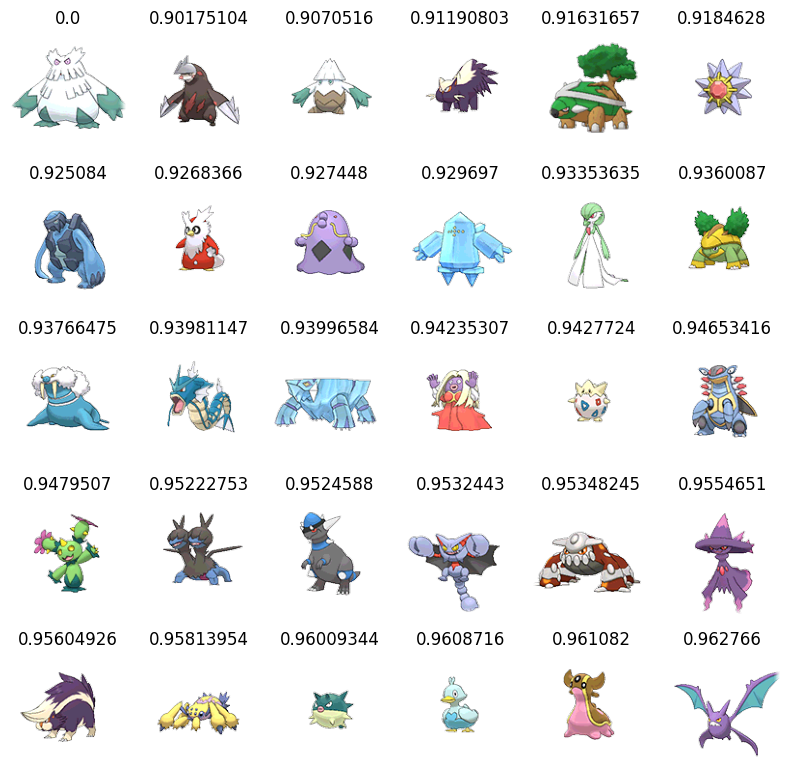

In [14]:
import matplotlib.pyplot as plt

# Target 이미지
img = Image.open("/content/drive/MyDrive/pokemon.zip (Unzipped Files)/images/images/abomasnow.png")
query = fe.extract(img)
# 유사도 계산
dists = np.linalg.norm(features - query, axis=1)
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()
#유클리드거리: 숫자가 작을수록 가까운 것.